<a href="https://colab.research.google.com/github/augenbroe/a-b-testing/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conversion Summary:
          sum  count  conversion_rate
group                               
control  503   5013         0.100339
variant  592   4987         0.118709

Z-stat: -2.94, P-value: 0.0033


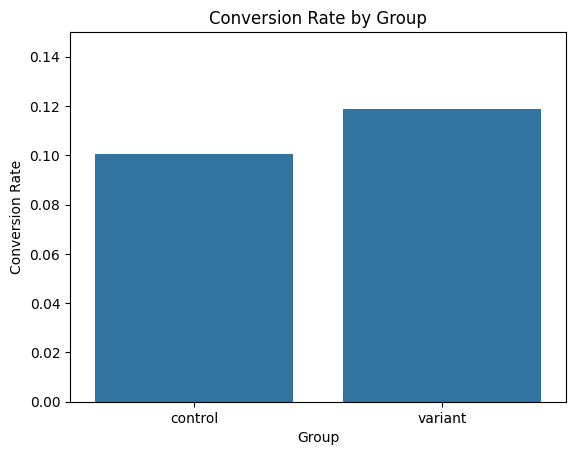

In [ ]:
# A/B Testing Simulation & Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# Simulate A/B Test Data
np.random.seed(42)
n = 10000

df = pd.DataFrame({
    'user_id': np.arange(n),
    'group': np.random.choice(['control', 'variant'], size=n),
})

# Conversion rates
control_rate = 0.10
variant_rate = 0.12

df['converted'] = df.apply(
    lambda row: np.random.binomial(1, control_rate if row['group'] == 'control' else variant_rate),
    axis=1
)

# Group-level conversion summary
summary = df.groupby('group')['converted'].agg(['sum', 'count'])
summary['conversion_rate'] = summary['sum'] / summary['count']
print("Conversion Summary:\n", summary)

# Z-test
zstat, pval = proportions_ztest(count=summary['sum'], nobs=summary['count'])
print(f"\nZ-stat: {zstat:.2f}, P-value: {pval:.4f}")

# Plot
sns.barplot(x=summary.index, y=summary['conversion_rate'].values)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, 0.15)
plt.show()